In [1]:
import numpy as np
import pandas as pd
from dl import queryClient as qc # You can find this package at https://github.com/astro-datalab/datalab
from matplotlib import pyplot as plt
import scipy
import io
import os
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

<h2>Plotting HR Diagrams for Star Clusters</h2>

There are dozens of star clusters within our galaxy with a variety of ages whose individual stars can be resolved. GAIA is a catalogue of objects in the sky, both stars and galaxies, from which we can very easily plot data on the stars within these clusters.

It's very easy to isolate the stars that belong to each cluster. Here I have done so for 4 clusters of various ages for comparison. Generally, you query a location and radius that contains the cluster, then make cuts on parallax and proper motion. Parallax is a type of distance measure and proper motion is a measure of the star's movement across the sky. Because a star cluster is a grouping of stars that move as one, the stars that belong to each cluster will be grouped in parallax and proper motion compared to other stars within the field of view. Data about the parallax and proper motions of the cluster as a whole can be found on the SIMBAD database (https://simbad.u-strasbg.fr/simbad/sim-basic?Ident=m6&submit=SIMBAD+search) and can be used as a guide.

<h2>Butterfly Cluster (M6)</h2>

In [2]:
position = (265.0690, -32.2420)
radius = 20 / 60.

query = '''
SELECT
    ra, dec, phot_g_mean_mag, bp_rp, parallax, pmra, pmdec
FROM gaia_dr3.gaia_source
WHERE
    't' = Q3C_RADIAL_QUERY(ra, dec, {}, {}, {})
'''.format(position[0], position[1], radius)

if os.path.exists('m6.csv'):
    data_cut = pd.read_csv('m6.csv')
else:
    result = qc.query(sql=query)
    data = pd.read_csv(io.StringIO(result))
    data = data[np.isfinite(data['parallax'])&np.isfinite(data['pmra'])&np.isfinite(data['pmdec'])].reset_index(drop=True)
    data_cut = data[(data['parallax']>1.8)&(data['parallax']<2.5)&(data['pmdec']<-5)&(data['pmdec']>-6.5)&(data['pmra']<-0.75)&(data['pmra']>-2)]
    data_cut.to_csv('m6.csv')

(-2.0, 4.0)

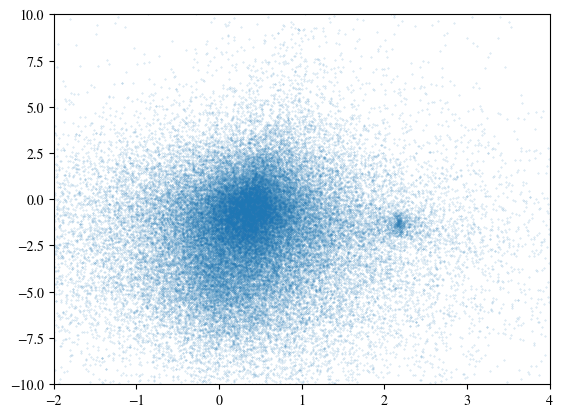

In [3]:
fig, ax = plt.subplots()
ax.scatter(data['parallax'], data['pmra'], s=0.1, alpha=0.3)
ax.set_ylim((-10, 10))
ax.set_xlim((-2, 4))

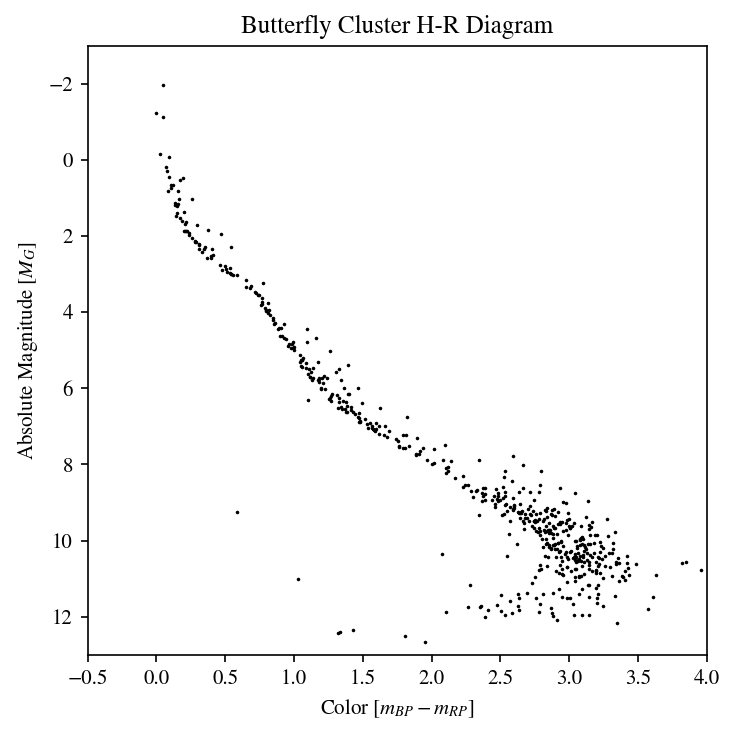

In [4]:
dpc = 1./(data_cut['parallax']/1000)
absmag = data_cut['phot_g_mean_mag']-5*np.log10(dpc)+5

fig, ax = plt.subplots(figsize=[5, 5], dpi=150)
ax.scatter(data_cut['bp_rp'], absmag, s=0.5, color='k')
ax.set_ylim((13, -3))
ax.set_xlim((-0.5, 4))
ax.set_title('Butterfly Cluster H-R Diagram')
ax.set_ylabel('Absolute Magnitude [$M_G$]')
ax.set_xlabel('Color [$m_{{BP}} - m_{{RP}}$]')
fig.tight_layout()

<h2>Beehive Cluster (M44)</h2>

In [5]:
position = (130.1, 19.683)
radius = 70 / 60.

query = '''
SELECT
    ra, dec, phot_g_mean_mag, bp_rp, parallax, pmra, pmdec
FROM gaia_dr3.gaia_source
WHERE
    't' = Q3C_RADIAL_QUERY(ra, dec, {}, {}, {})
'''.format(position[0], position[1], radius)

if os.path.exists('beehive.csv'):
    data_cut = pd.read_csv('beehive.csv')
else:
    result = qc.query(sql=query)
    data = pd.read_csv(io.StringIO(result))
    data = data[np.isfinite(data['parallax'])&np.isfinite(data['pmra'])&np.isfinite(data['pmdec'])].reset_index(drop=True)
    data_cut = data[(data['parallax']>4.5)&(data['parallax']<6.2)&(data['pmra']<-33)&(data['pmra']>-39)]
    data_cut.to_csv('beehive.csv')

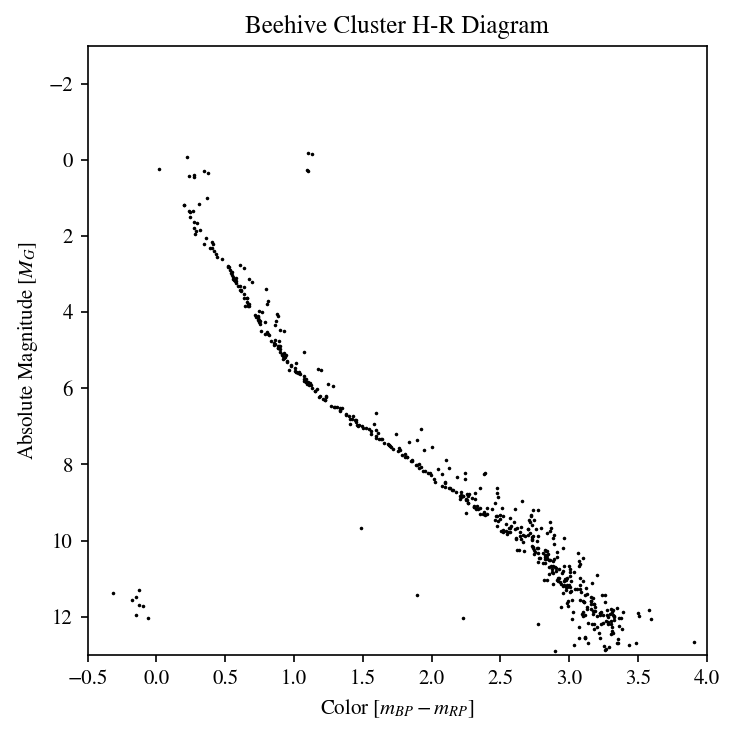

In [6]:
dpc = 1./(data_cut['parallax']/1000)
absmag = data_cut['phot_g_mean_mag']-5*np.log10(dpc)+5

fig, ax = plt.subplots(figsize=[5, 5], dpi=150)
ax.scatter(data_cut['bp_rp'], absmag, s=0.5, color='k')
ax.set_ylim((13, -3))
ax.set_xlim((-0.5, 4))
ax.set_title('Beehive Cluster H-R Diagram')
ax.set_ylabel('Absolute Magnitude [$M_G$]')
ax.set_xlabel('Color [$m_{{BP}} - m_{{RP}}$]')
fig.tight_layout()

<h2>M67</h2>

In [7]:
position = (132.825, 11.8)
radius = 25 / 60.

query = '''
SELECT
    ra, dec, phot_g_mean_mag, bp_rp, parallax, pmra, pmdec, teff_gspphot
FROM gaia_dr3.gaia_source
WHERE
    't' = Q3C_RADIAL_QUERY(ra, dec, {}, {}, {})
'''.format(position[0], position[1], radius)

if os.path.exists('m67.csv'):
    data_cut = pd.read_csv('m67.csv')
else:
    result = qc.query(sql=query)
    data = pd.read_csv(io.StringIO(result))
    data = data[np.isfinite(data['parallax'])&np.isfinite(data['pmra'])&np.isfinite(data['pmdec'])].reset_index(drop=True)
    data_cut = data[(data['parallax']>0.75)&(data['parallax']<1.5)&(data['pmra']<-10)&(data['pmra']>-12)]
    data_cut.to_csv('m67.csv')

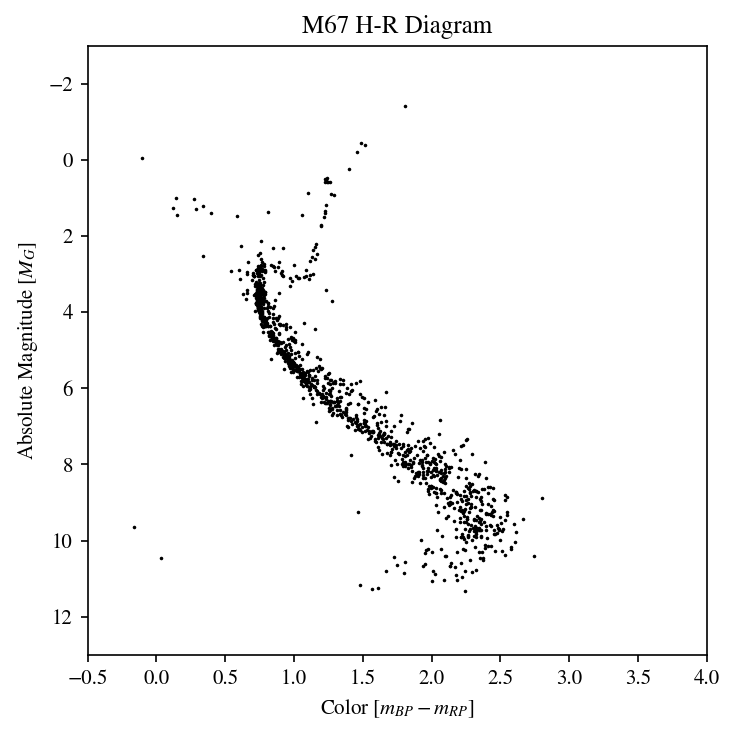

In [8]:
dpc = 1./(data_cut['parallax']/1000)
absmag = data_cut['phot_g_mean_mag']-5*np.log10(dpc)+5

fig, ax = plt.subplots(figsize=[5, 5], dpi=150)
ax.scatter(data_cut['bp_rp'], absmag, s=0.5, color='k')
ax.set_ylim((13, -3))
ax.set_xlim((-0.5, 4))
ax.set_title('M67 H-R Diagram')
ax.set_ylabel('Absolute Magnitude [$M_G$]')
ax.set_xlabel('Color [$m_{{BP}} - m_{{RP}}$]')
fig.tight_layout()

<h2>M4</h2>

In [9]:
position = (245.89675, -26.52575)
radius = 36 / 60.

query = '''
SELECT
    ra, dec, phot_g_mean_mag, bp_rp, parallax, pmra, pmdec, teff_gspphot
FROM gaia_dr3.gaia_source
WHERE
    't' = Q3C_RADIAL_QUERY(ra, dec, {}, {}, {})
'''.format(position[0], position[1], radius)

if os.path.exists('m4.csv'):
    data_cut = pd.read_csv('m4.csv')
else:
    result = qc.query(sql=query)
    data = pd.read_csv(io.StringIO(result))
    data = data[np.isfinite(data['parallax'])&np.isfinite(data['pmra'])&np.isfinite(data['pmdec'])].reset_index(drop=True)
    data_cut = data[(data['parallax']>0.35)&(data['parallax']<0.7)&(data['pmdec']<-18.3)&(data['pmdec']>-19.8)&(data['pmra']<-11.5)&(data['pmra']>-13.5)]
    data_cut.to_csv('m4.csv')

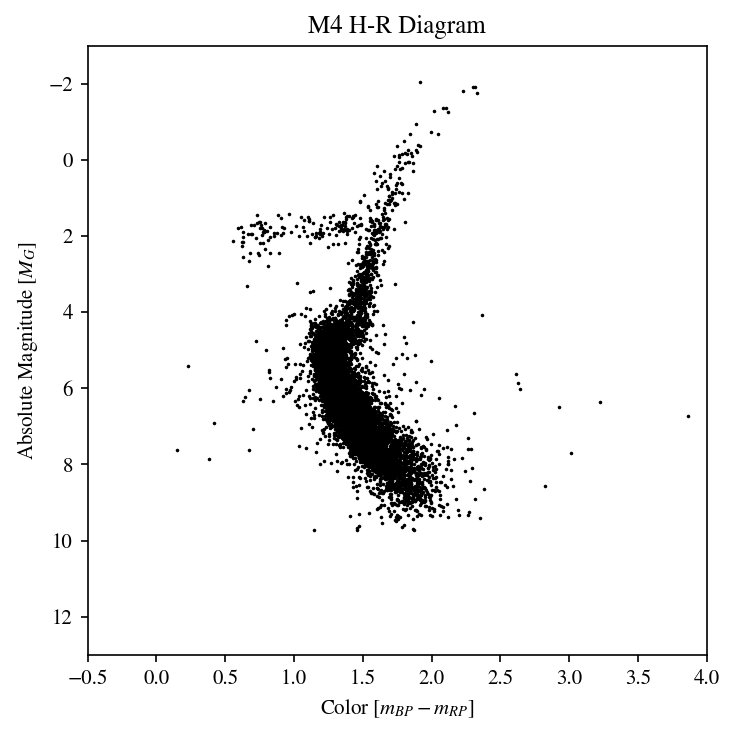

In [10]:
dpc = 1./(data_cut['parallax']/1000)
absmag = data_cut['phot_g_mean_mag']-5*np.log10(dpc)+5

fig, ax = plt.subplots(figsize=[5, 5], dpi=150)
ax.scatter(data_cut['bp_rp'], absmag, s=0.5, color='k')
ax.set_ylim((13, -3))
ax.set_xlim((-0.5, 4))
ax.set_title('M4 H-R Diagram')
ax.set_ylabel('Absolute Magnitude [$M_G$]')
ax.set_xlabel('Color [$m_{{BP}} - m_{{RP}}$]')
fig.tight_layout()

<h2>Comparison</h2>

I'm plotting the absolute magnitude in G-band versus the color, the difference in B-band and R-band magnitudes. Absolute magnitude can be computed from the parallax and the apparent magnitude. The color is a proxy for temperature, as the difference in brightness in different wavelengths is related to the slope of the blackbody spectrum emitted by the star, which depends only on temperature. I've also added a correction factor to the color to approximate an extinction correction.

It's clear to see that the different clusters follow a similar pattern, but some have many more stars entering the end of their life cycle. The point at which the stars are leaving the main sequence can be used to estimate the age of the cluster, as all the stars in the cluster formed from the same material at the same time, and the main sequence lifetime of a star depends on its luminosity.

Some clusters show dimmer stars than others. Why?

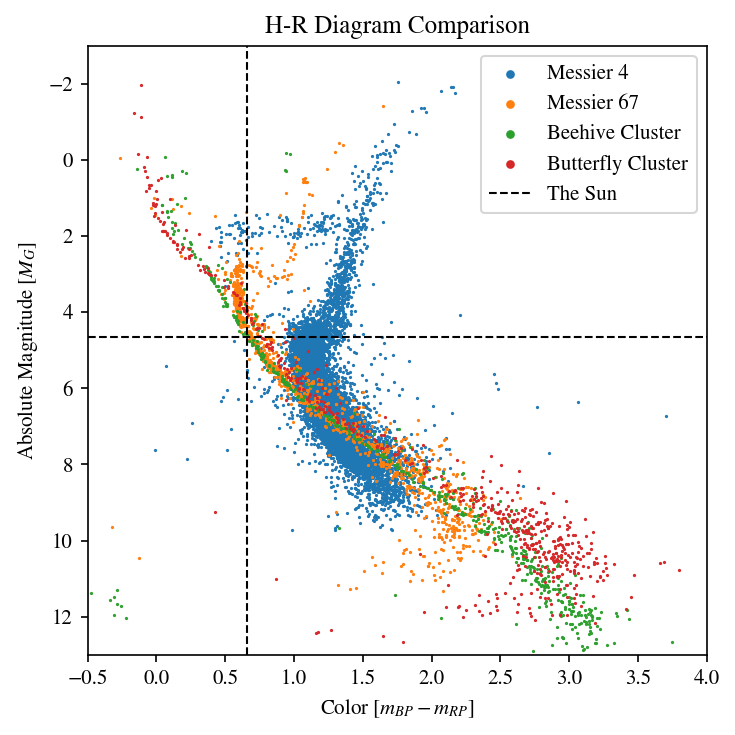

In [11]:
names = ['m4', 'm67', 'beehive', 'm6']
labels = ['Messier 4', 'Messier 67', 'Beehive Cluster', 'Butterfly Cluster']

fig, ax = plt.subplots(dpi=150, figsize=(5,5))
for i in range(4):
    cluster = pd.read_csv(f'{names[i]}.csv')
    ax.scatter(cluster['bp_rp']-0.16, cluster['phot_g_mean_mag']-5*np.log10(1./(cluster['parallax']/1000))+5, s=0.3, alpha=1, label=labels[i])
ax.axvline(0.656, color='k', linestyle='--', linewidth=1, label='The Sun')
ax.axhline(4.66, color='k', linestyle='--', linewidth=1)
ax.set_ylim((13, -3))
ax.set_xlim((-0.5, 4))
ax.set_title('H-R Diagram Comparison')
ax.set_ylabel('Absolute Magnitude [$M_G$]')
ax.set_xlabel('Color [$m_{{BP}} - m_{{RP}}$]')
lgnd = ax.legend()
for i in range(4):
    lgnd.legend_handles[i]._sizes = [10]
fig.tight_layout()

<h2>Age Estimation</h2>

To estimate the age, we need to connect stellar luminosity to main sequence lifetime $\tau$. This depends on many things, but astronomers love to conveniently bunch everything into composite scaling laws. We can exploit two such relations (see Stellar Interiors (Hansen et al), equation 1.90 for more details):

<h2>$\frac{L}{L_\odot}\approx (\frac{M}{M_\odot})^{3.5}$</h2>

<h2>$\tau\approx 10^{10} (\frac{M}{M_\odot})^{-2.5}\;yr\approx 10^{10} (\frac{L}{L_\odot})^{-5/7}\;yr$</h2>

Now we just need the luminosity of a star at the turn-off point, which can be calculated from Absolute G-band Magnitude using this equation, assuming an Absolute Magnitude in G-band for 4.66 for the Sun, given by GAIA:

<h2>$\frac{L}{L_\odot}=10^{\,0.4\,(4.66 - M_G)}$</h2>

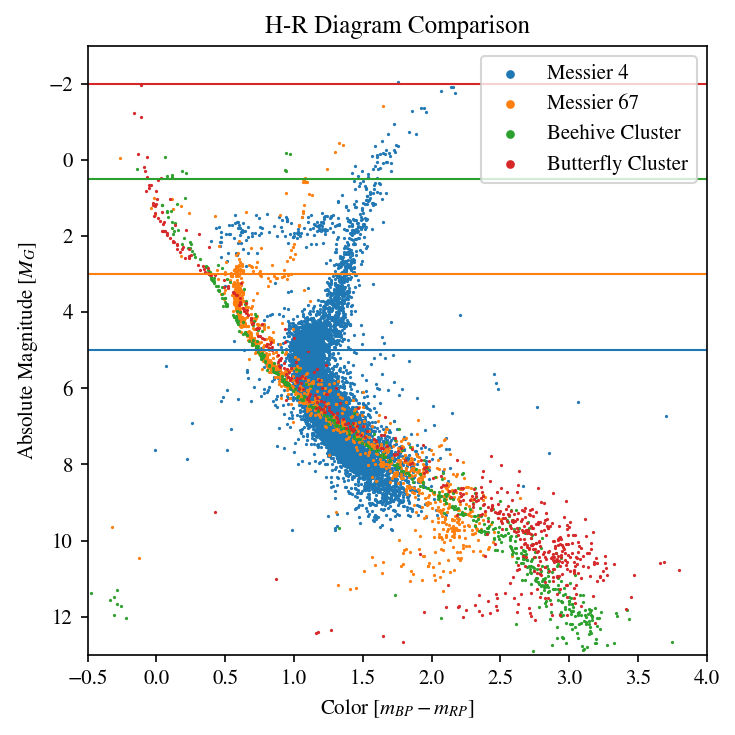

In [12]:
names = ['m4', 'm67', 'beehive', 'm6']
labels = ['Messier 4', 'Messier 67', 'Beehive Cluster', 'Butterfly Cluster']
colors = ['C0', 'C1', 'C2', 'C3']
turnoff = [5, 3, 0.5, -2]

fig, ax = plt.subplots(dpi=150, figsize=(5,5))
for i in range(4):
    cluster = pd.read_csv(f'{names[i]}.csv')
    ax.scatter(cluster['bp_rp']-0.16, cluster['phot_g_mean_mag']-5*np.log10(1./(cluster['parallax']/1000))+5, s=0.3, alpha=1, label=labels[i], color=colors[i])
    ax.axhline(turnoff[i], color=colors[i], linewidth=1)
ax.set_ylim((13, -3))
ax.set_xlim((-0.5, 4))
ax.set_title('H-R Diagram Comparison')
ax.set_ylabel('Absolute Magnitude [$M_G$]')
ax.set_xlabel('Color [$m_{{BP}} - m_{{RP}}$]')
lgnd = ax.legend()
for i in range(4):
    lgnd.legend_handles[i]._sizes = [10]
fig.tight_layout()

In [13]:
def mainSequenceAgeFromGMag(mag_g):
    lum = 10**(0.4*(4.66-mag_g))
    return 1e10 * lum**(-5./7.)

print('Cluster Age Estimates:\n')
for i in range(4):
    print('{}: {:.2f} Gyr'.format(labels[i], mainSequenceAgeFromGMag(turnoff[i])/1e9))

Cluster Age Estimates:

Messier 4: 12.51 Gyr
Messier 67: 3.36 Gyr
Beehive Cluster: 0.65 Gyr
Butterfly Cluster: 0.13 Gyr


<h4>Accepted Cluster Age Values</h4>

Messier 4: 12.2 Gyr

Messier 67: 3.2 - 5 Gyr

Beehive Cluster: 0.6 - 0.7 Gyr

Butterfly Cluster: 0.094 Gyr

Our dirty estimation was pretty accurate! This was a very unscientific and rough estimation, but it does get us close. When finding the cluster ages of all the clusters that we can see, we don't find any with an age much higher than 13 Gyr, which gives us a direct experimental hint to the age of the universe.

<h2>Cosmology with tRGB</h2>

This concept of star clusters, stellar evolution, and brightness can be used as a standard candle. When a star leaves the main sequence and uses up its Hydrogen fuel, the maximum luminosity of a star before its Helium Flash occurs is physically limited by processes within the star, and does not vary much according to mass and metallicity. This gives rise to the Tip of the Red Giant Branch method for measuring the Hubble Constant, a measurement which has seen recent success after the launch of JWST. I recommend you scan these papers to learn a little bit about the history and methods of the tRGB method, as it is an important cosmological probe and a middle rung in the cosmic distance ladder.

Theory: https://arxiv.org/abs/1706.09910

Practice: https://arxiv.org/abs/2106.15656

<h2>Extra: Cluster Age using Color</h2>

Due to the nature of how stars peel off the main sequence upward, it is generally better to determine cluster age by Color/Classification/Temperature, the horizontal axis in a HR diagram. However, this method requires a lot more modeling and assumptions, and a lot of things need to be considered. I'm going to show a very rudimentary estimation method here.

We're going to need to do a lot of estimation. In order to model the color of stars in the GAIA filters, we are going to need to estimate how bright stars will be and then how bright they will look in the telescope. First, I get the GAIA DR3 passbands (https://www.cosmos.esa.int/web/gaia/edr3-passbands) to match the star data. This is a measure of how sensitive each filter of the telescope is to certain wavelengths, called Transmissivity. A Transmissivity of 1 means that all the flux from an object is detected by the instrument.

In [14]:
wavelength = np.loadtxt('gaia_passbands.dat', usecols=[0])
gaia_g_bandpass = np.loadtxt('gaia_passbands.dat', usecols=[1])
gaia_b_bandpass = np.loadtxt('gaia_passbands.dat', usecols=[3])
gaia_r_bandpass = np.loadtxt('gaia_passbands.dat', usecols=[5])

gaia_g_bandpass[gaia_g_bandpass>90] = 0
gaia_b_bandpass[gaia_b_bandpass>90] = 0
gaia_r_bandpass[gaia_r_bandpass>90] = 0

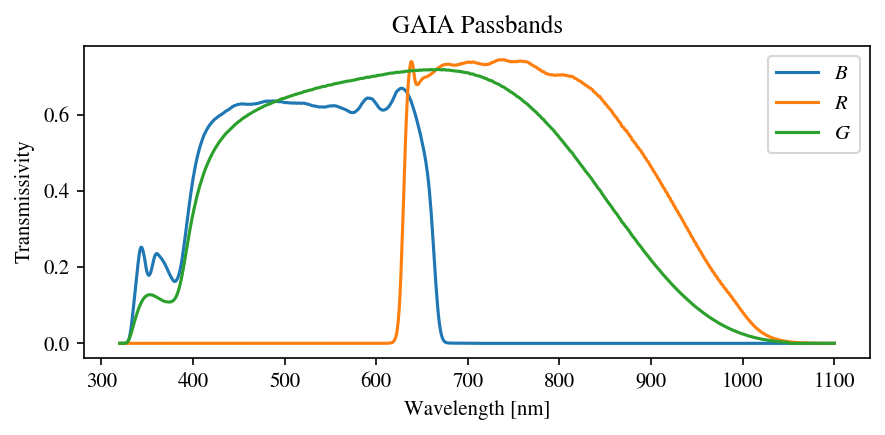

In [15]:
fig, ax = plt.subplots(dpi=150, figsize=[6, 3])
ax.plot(wavelength, gaia_b_bandpass, label='$B$')
ax.plot(wavelength, gaia_r_bandpass, label='$R$')
ax.plot(wavelength, gaia_g_bandpass, label='$G$')
ax.set_title('GAIA Passbands')
ax.set_ylabel('Transmissivity')
ax.set_xlabel('Wavelength [nm]')
ax.legend()
fig.tight_layout()

How do we estimate the brightness of a star? Stars can be modelled fairly well as blackbody objects, with their energy output distribution dependent on wavelength. Real stellar energy distributions are marked with atomic absorption lines depending on the elements that live in the atmosphere of the star. The blackbody model works well for high temperature blue stars because the only elemental absorption lines that show in the distribution are from Hydrogen. Low temperature red stars deviate more from the blackbody spectrum because more lines crowd the distribution.

Keeping this in mind, we can calculate the flux output of a star using Planck's Law:

<h2>$B_{\lambda}=\frac{2hc^2}{\lambda^5}\frac{1}{e^{hc/\lambda kT}-1}$</h2>

This equation gives the irradiance of a blackbody at its surface in units of $W\;m^{-2}\;nm^{-1}\;sr^{-1}$. In order to calculate the flux of the star at Earth, we would need to multiply $B_\lambda$ by the surface area of the star to get the luminosity, then calculate the flux at Earth from the luminosity and the distance to the star. However, because we are calculating Color, a difference of two magnitudes from the same star, we can exploit some features of math.

This is the equation to calculate apparent magnitude $m_x$ from flux $F_x$ in a certain band $x$, given a zeropoint $ZP_x$ for mag 0 (given by GAIA):

<h2>$m_x=-\,2.5\;log_{10}\,F_x + ZP_x$</h2>

The color is just a difference of two magnitudes:

<h2>$m_b-m_r=-\,2.5\;log_{10}\,F_b + 2.5\;log_{10}\,F_r + ZP_b - ZP_r=-\,2.5\;log_{10}\,(\frac{F_b}{F_r}) + ZP_b - ZP_r$</h2>

Because the color involves a ratio of fluxes, all terms which are common cancel, including any area or distance considerations. All that is necessary is the flux of the star in each band, given by this equation (https://arxiv.org/pdf/1112.2698), where $S_x$ is the Transmissivity curve of band $x$:

<h2>$F_x=\frac{\int{B_\lambda\,(\lambda)\,S_x\,(\lambda)\,\lambda\,d\lambda}}{\int\frac{c}{\lambda}S_x\,(\lambda)\,d\lambda}$</h2>

Now we can calculate the response curves from a blackbody in each filter.

In [62]:
def blackbody(temp):
    # Planck's Law
    wl = np.array(wavelength) / 1e9
    h = 6.626e-34
    c = 299792458
    k = 1.38e-23
    return (2*h*c*c*wl**(-5))/(np.exp(h*c/(wl*k*temp))-1)

def get_br_color(temp):
    # Taken from https://arxiv.org/pdf/1112.2698, Equation 2
    wl = np.array(wavelength)/1e9
    flux_b = scipy.integrate.simpson(blackbody(temp)*gaia_b_bandpass*wl, x=wl) / scipy.integrate.simpson(299792458*gaia_b_bandpass/wl, x=wl)
    flux_r = scipy.integrate.simpson(blackbody(temp)*gaia_r_bandpass*wl, x=wl) / scipy.integrate.simpson(299792458*gaia_r_bandpass/wl, x=wl)
    return -2.5*np.log10(flux_b/flux_r) + 25.3539555559 - 25.1039837393 # These are the zeropoints for b and r bands

def get_g_absmag(temp):
    # Luminosity/Temperature Scaling Relation fixed to Solar Zeropoint
    return -2.5*np.log10((temp/5800)**8) + 4.66

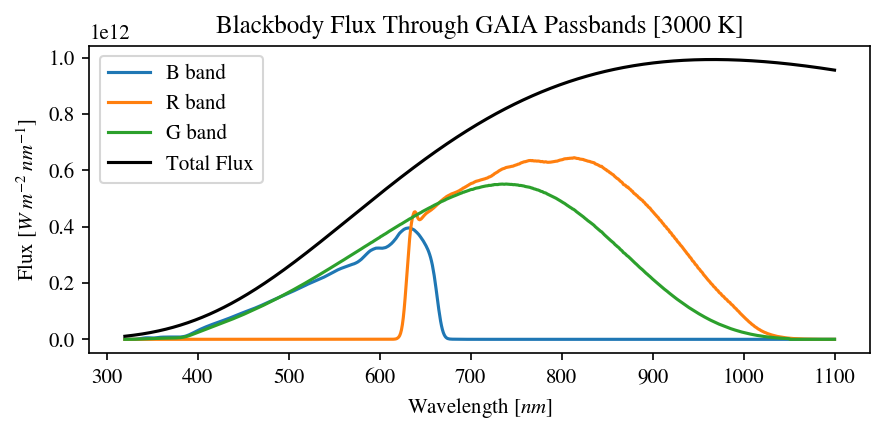

In [63]:
te = 3000
fig, ax = plt.subplots(dpi=150, figsize=[6, 3])
ax.plot(wavelength, blackbody(te)*gaia_b_bandpass, label='B band')
ax.plot(wavelength, blackbody(te)*gaia_r_bandpass, label='R band')
ax.plot(wavelength, blackbody(te)*gaia_g_bandpass, label='G band')
ax.plot(wavelength, blackbody(te), color='k', label='Total Flux')
ax.set_title(f'Blackbody Flux Through GAIA Passbands [{te} K]')
ax.set_ylabel('Flux [$W\\;m^{{-2}}\\;nm^{{-1}}$]')
ax.set_xlabel('Wavelength [$nm$]')
ax.legend()
fig.tight_layout()

Now that we can directly estimate B-R color for a star of a given temperature, we can relate the temperature to luminosity and estimate the cluster age as before from the turn-off points. Luminosity is related to temperature by $L \sim T^8$ (see Basic Astrophysics (Dan Maoz) equation 3.93 for more details).

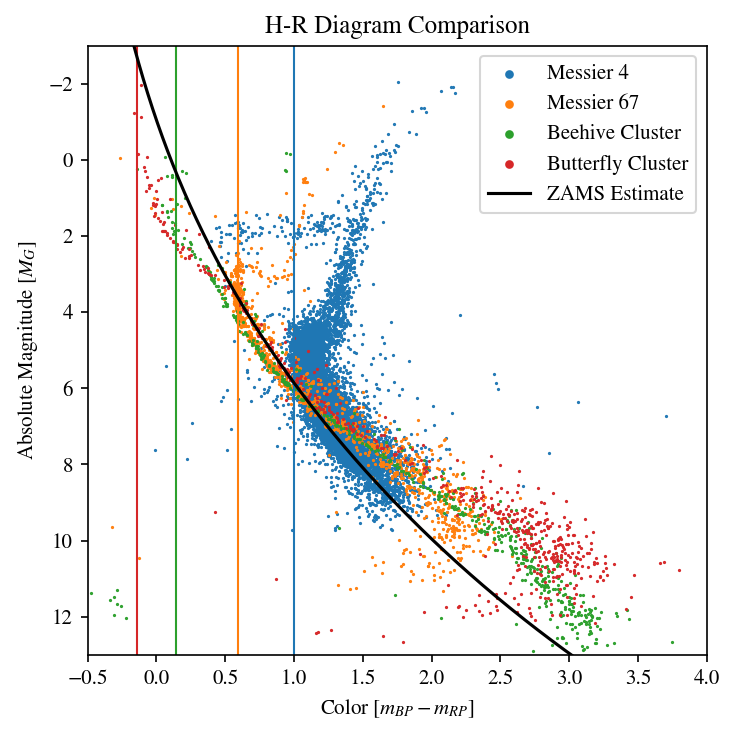

In [64]:
temp_array = np.linspace(20000, 2000, 1000)
interp_colors = []
interp_absmags = []
for i in range(len(temp_array)):
    interp_colors.append(get_br_color(temp_array[i]))
    interp_absmags.append(get_g_absmag(temp_array[i]))
color_temp_interpolator = scipy.interpolate.interp1d(interp_colors, temp_array)

names = ['m4', 'm67', 'beehive', 'm6']
labels = ['Messier 4', 'Messier 67', 'Beehive Cluster', 'Butterfly Cluster']
colors = ['C0', 'C1', 'C2', 'C3']
turnoff = [1.0, 0.59, 0.14, -0.14]

fig, ax = plt.subplots(dpi=150, figsize=(5,5))
for i in range(4):
    cluster = pd.read_csv(f'{names[i]}.csv')
    ax.scatter(cluster['bp_rp']-0.16, cluster['phot_g_mean_mag']-5*np.log10(1./(cluster['parallax']/1000))+5, s=0.3, alpha=1, label=labels[i], color=colors[i])
    ax.axvline(turnoff[i], color=colors[i], linewidth=1)
ax.plot(interp_colors, interp_absmags, color='k', label='ZAMS Estimate')
ax.set_ylim((13, -3))
ax.set_xlim((-0.5, 4))
ax.set_title('H-R Diagram Comparison')
ax.set_ylabel('Absolute Magnitude [$M_G$]')
ax.set_xlabel('Color [$m_{{BP}} - m_{{RP}}$]')
lgnd = ax.legend()
for i in range(4):
    lgnd.legend_handles[i]._sizes = [10]
fig.tight_layout()

In [65]:
def mainSequenceAgeFromColor(color):
    temp = color_temp_interpolator(color)
    lum = (temp/5800)**8.
    return 1e10 * lum**(-5./7.)

print('Cluster Age Estimates:\n')
for i in range(4):
    print('{}: {:.2f} Gyr'.format(labels[i], mainSequenceAgeFromColor(turnoff[i])/1e9))

Cluster Age Estimates:

Messier 4: 21.99 Gyr
Messier 67: 5.00 Gyr
Beehive Cluster: 0.57 Gyr
Butterfly Cluster: 0.08 Gyr


You can see that our approximations do not follow the main sequence very well, but it is definitely good enough for the younger clusters. Looking at M4, it's clear that the low mass stars have more corrections that must be made for a decent approximation.